<a href="https://colab.research.google.com/github/Tyton25/machine_learning/blob/master/sterlings_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [182]:
# X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0, 17.0, 20.0, 23.0, 26.0, 29.0])
# y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0, 27.0, 30.0, 33.0, 36.0, 39.0])
# y = tf.range(3, 40, 3, dtype=tf.float32)
X = tf.range(-100, 2000, 3, dtype=tf.float32)
y = X + 10
X, y

(<tf.Tensor: shape=(700,), dtype=float32, numpy=
 array([-1.000e+02, -9.700e+01, -9.400e+01, -9.100e+01, -8.800e+01,
        -8.500e+01, -8.200e+01, -7.900e+01, -7.600e+01, -7.300e+01,
        -7.000e+01, -6.700e+01, -6.400e+01, -6.100e+01, -5.800e+01,
        -5.500e+01, -5.200e+01, -4.900e+01, -4.600e+01, -4.300e+01,
        -4.000e+01, -3.700e+01, -3.400e+01, -3.100e+01, -2.800e+01,
        -2.500e+01, -2.200e+01, -1.900e+01, -1.600e+01, -1.300e+01,
        -1.000e+01, -7.000e+00, -4.000e+00, -1.000e+00,  2.000e+00,
         5.000e+00,  8.000e+00,  1.100e+01,  1.400e+01,  1.700e+01,
         2.000e+01,  2.300e+01,  2.600e+01,  2.900e+01,  3.200e+01,
         3.500e+01,  3.800e+01,  4.100e+01,  4.400e+01,  4.700e+01,
         5.000e+01,  5.300e+01,  5.600e+01,  5.900e+01,  6.200e+01,
         6.500e+01,  6.800e+01,  7.100e+01,  7.400e+01,  7.700e+01,
         8.000e+01,  8.300e+01,  8.600e+01,  8.900e+01,  9.200e+01,
         9.500e+01,  9.800e+01,  1.010e+02,  1.040e+02,  1.070e+02,

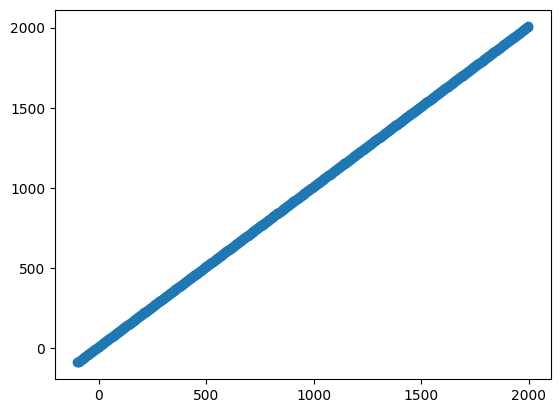

In [145]:
plt.scatter(X,y)

In [180]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=0)

In [181]:
model.predict([20.0])

1/1 [==============================] - 0s 108ms/step


array([[29.428476]], dtype=float32)

In [166]:
x_length = len(X)
x_length

700

In [174]:
x_idx = int(x_length * 0.8)
x_idx

560

In [177]:
X_train = X[:x_idx]
y_train = y[:x_idx]

In [178]:
X_test = X[x_idx:]
y_test = y[x_idx:]

In [179]:
len(X_train), len(X_test), len(y_train), len(y_test)

(560, 140, 560, 140)